In [1]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

# Extract Data From Before Growing

In [2]:
databse_name = "fehring_growing_nn"
table_name = "blackbox_incumbent_gen"

In [3]:
smac_costs = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-16 13:31:18,619  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-16 13:31:18,620  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-16 13:31:18,620  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-16 13:31:18,621  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-16 13:31:18,621  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-16 13:31:18,621  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-16 13:31:18,622  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-16 13:31:18,622  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-16 13:31:18,622  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-16 13:31:18,622  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-16 13:31:18,700  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-16 13:31:18,848  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-16 13:31:18,930  | py-experimenter - INFO     | Opening tunnel: 127.0.0.1:3306 <> 127.0.0.1:3306
2024-07-16 13:31:19,023  | py-experimenter - INFO     | Initialized and connected to database


In [4]:
# Select Row with Minimal Cost
grow_once_cost = smac_costs[smac_costs["experiment_id"] == 1]
grow_once_minimal_cost_row = smac_costs.loc[smac_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"]
minimal_cost = grow_once_minimal_cost_row["cost"]

In [5]:
# Get Training Process Logtable
training_process_logtable = "training_process"
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-16 13:31:19,187  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-16 13:31:19,188  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-16 13:31:19,188  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-16 13:31:19,189  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-16 13:31:19,189  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-16 13:31:19,189  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-16 13:31:19,189  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-16 13:31:19,190  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-16 13:31:19,190  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-16 13:31:19,190  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-16 13:31:19,265  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-16 13:31:19,411  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-16 13:31:19,493  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-16 13:31:19,494  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-16 13:31:19,494  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-16 13:31:19,494  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-16 13:31:19,495  | py-experimenter - INFO     | Closing all open connections...
2024-07-16 13:31:19,495  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [6]:
# Select entries 
relevat_training_process_before_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
relevat_training_process_before_growth

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,evaluated_cost,evaluated_stdev
8900,8901,3,2024-07-10 23:42:38,2,39,None,50000,-1.964,0.038781
8901,8902,3,2024-07-10 23:42:38,2,39,None,100000,-1.080,1.120040
8902,8903,3,2024-07-10 23:42:38,2,39,None,150000,-0.869,1.106260
8903,8904,3,2024-07-10 23:42:38,2,39,None,200000,-0.780,1.230020
8904,8905,3,2024-07-10 23:42:39,2,39,None,250000,-0.794,0.972473
...,...,...,...,...,...,...,...,...,...
8995,8996,3,2024-07-10 23:45:59,4,39,None,800000,0.800,0.400000
8996,8997,3,2024-07-10 23:46:00,4,39,None,850000,1.000,0.000000
8997,8998,3,2024-07-10 23:46:00,4,39,None,900000,1.000,0.000000
8998,8999,3,2024-07-10 23:46:00,4,39,None,950000,1.000,0.000000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

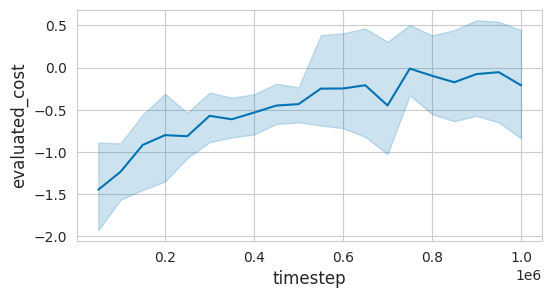

In [7]:
# SNS plot training proccess. "timestep" on x, "evalauted_cost on y"
sns.lineplot(data=relevat_training_process_before_growth, x="timestep", y="evaluated_cost")

# Add Grow Once Data

In [8]:
table_name = "net2deeper_grow_once"

In [9]:
grow_once_cost = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")
smac_grow_once_costs = grow_once_cost[grow_once_cost["experiment_id"] == 4]


2024-07-16 13:31:20,063  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-16 13:31:20,064  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-16 13:31:20,064  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-16 13:31:20,064  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-16 13:31:20,065  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-16 13:31:20,065  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-16 13:31:20,065  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-16 13:31:20,066  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-16 13:31:20,066  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-16 13:31:20,066  | py-experimenter - WARNING  | No values given for keyfield total_time

In [10]:
# select row with minimal cost
grow_once_minimal_cost_row = grow_once_cost.loc[smac_grow_once_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"]
minimal_cost = grow_once_minimal_cost_row["cost"]


In [11]:
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-16 13:31:20,578  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-16 13:31:20,578  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-16 13:31:20,579  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-16 13:31:20,579  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-16 13:31:20,579  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-16 13:31:20,579  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-16 13:31:20,580  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-16 13:31:20,580  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-16 13:31:20,580  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-16 13:31:20,580  | py-experimenter - WARNING  | No values given for keyfield total_time

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

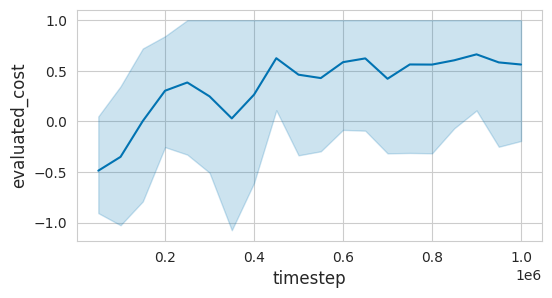

In [12]:
# Plot training process after growth
relevat_training_process_after_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=relevat_training_process_after_growth, x="timestep", y="evaluated_cost")

2024-07-16 13:31:21,304  | py.warnings - WARNING  | /tmp/ipykernel_372528/1429544113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-07-16 13:31:21,304  | py.warnings - WARNING  | /tmp/ipykernel_372528/1429544113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-07-16 13:31

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

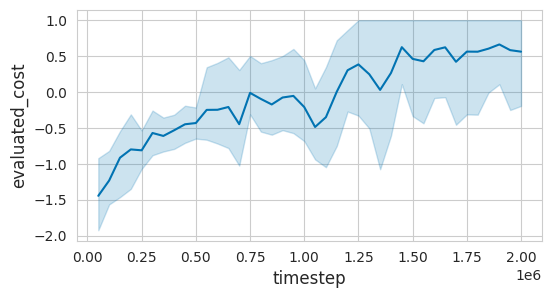

In [13]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()
combined_growed = pd.concat([relevat_training_process_before_growth, relevat_training_process_after_growth])
sns.lineplot(data=combined_growed, x="timestep", y="evaluated_cost")

# Add Baseline

In [14]:
table_name = "hpo_warmstart"

In [15]:
grow_once_cost = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")
smac_cost_warmstarting = grow_once_cost[grow_once_cost["experiment_id"] == 5]

2024-07-16 13:31:21,643  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-16 13:31:21,643  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-16 13:31:21,643  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-16 13:31:21,644  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-16 13:31:21,644  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-16 13:31:21,644  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-16 13:31:21,644  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-16 13:31:21,644  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-16 13:31:21,645  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-16 13:31:21,645  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-16 13:31:21,717  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-16 13:31:21,865  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-16 13:31:21,946  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-16 13:31:21,947  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-16 13:31:21,947  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-16 13:31:21,947  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-16 13:31:21,947  | py-experimenter - INFO     | Closing all open connections...
2024-07-16 13:31:21,948  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [16]:

samc_cost_warmstarting_row = smac_cost_warmstarting.loc[smac_cost_warmstarting["cost"].idxmin()]
minimal_cost_experiment_id = samc_cost_warmstarting_row["experiment_id"]
minimal_cost_trial = samc_cost_warmstarting_row["trial_number"]
minimal_cost = samc_cost_warmstarting_row["cost"]

In [17]:
minimal_cost_trial

2

In [18]:
training_process_after_warmstarting = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-16 13:31:22,174  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-16 13:31:22,174  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-16 13:31:22,174  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-16 13:31:22,174  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-16 13:31:22,175  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-16 13:31:22,175  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-16 13:31:22,175  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-16 13:31:22,175  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-16 13:31:22,175  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-16 13:31:22,176  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-16 13:31:22,250  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-16 13:31:22,397  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-16 13:31:22,473  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-16 13:31:22,474  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-16 13:31:22,474  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-16 13:31:22,474  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-16 13:31:22,475  | py-experimenter - INFO     | Closing all open connections...
2024-07-16 13:31:22,475  | py-experimenter - WARNING  | Tunnels are not started. Please .s

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

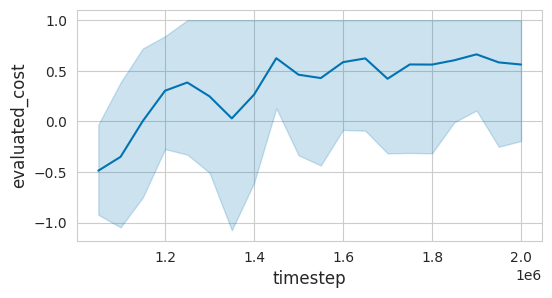

In [19]:
# Plot training process after warmstarting
training_process_after_warmstarting = training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=relevat_training_process_after_growth, x="timestep", y="evaluated_cost")

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

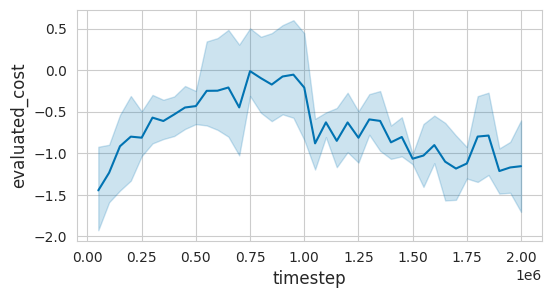

In [20]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
training_process_after_warmstarting["timestep"] += training_process_after_warmstarting["timestep"].max()
combined_warmstarted = pd.concat([relevat_training_process_before_growth, training_process_after_warmstarting])
sns.lineplot(data=combined_warmstarted, x="timestep", y="evaluated_cost")

# Compare Warmstarting and Growth

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

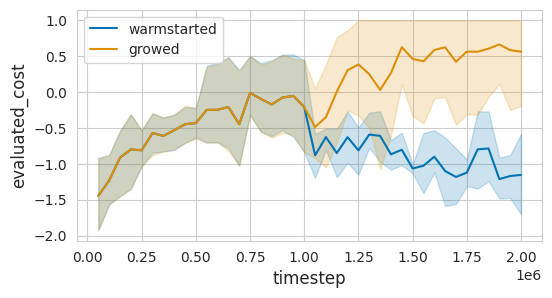

In [21]:
sns.lineplot(data=combined_warmstarted, x="timestep", y="evaluated_cost", label="warmstarted")
sns.lineplot(data=combined_growed, x="timestep", y="evaluated_cost", label="growed")
